<a href="https://colab.research.google.com/github/shrishtiswaraj/Attendance-project/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#set seed for reprossducibility
import random
random.seed(0)

import numpy as  np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)


In [ ]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

Data curation


In [ ]:
#loadinpg and preparing mnist dataset
fashion_mnist=datasets.fashion_mnist
9(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


DATA PREPROCESSING

In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
print(len( train_images))
print(len( test_images))

60000
10000


In [ ]:
print(train_images.shape)

(60000, 28, 28)


In [ ]:
print(train_images[0].shape) #greyscale image

(28, 28)


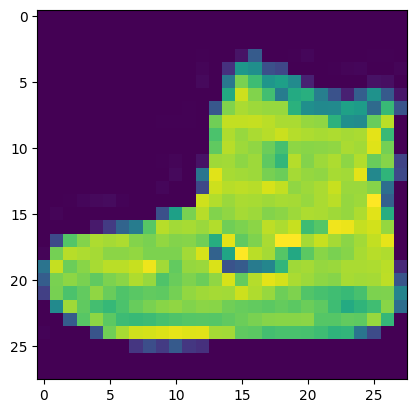

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

In [ ]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [ ]:
print(train_labels[0])

9


In [ ]:
print(train_labels)

[9 0 0 ... 3 0 5]


Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [ ]:
#normalizing the pixel values
train_images=train_images/255.0
test_images=test_images/255.0

In [ ]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [ ]:
#reshape image to a speccify image as  a greyscale
train_images=train_images.reshape(len(train_images),28,28,1) # 1 means its a greeyscale so we mention and trying to reshape it to greyscale
test_images=test_images.reshape(len(test_images),28,28,1)


In [ ]:
print(train_images.shape)

(60000, 28, 28, 1)


CONVOLUTIONAL NEURAL NETWORK

In [ ]:
#building  a neural network

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))


#adding dense layer on top
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))



In [ ]:
#compile and train the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))


Epoch 1/5
1875/1875 [==============================] - 17s 7ms/step - loss: 0.4881 - accuracy: 0.8224 - val_loss: 0.3629 - val_accuracy: 0.8718
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3179 - accuracy: 0.8828 - val_loss: 0.3155 - val_accuracy: 0.8886
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2709 - accuracy: 0.9004 - val_loss: 0.3025 - val_accuracy: 0.8908
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2401 - accuracy: 0.9106 - val_loss: 0.2677 - val_accuracy: 0.9034
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2168 - accuracy: 0.9202 - val_loss: 0.2731 - val_accuracy: 0.9034


In [ ]:
#evaluate the model
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.2731 - accuracy: 0.9034 - 1s/epoch - 4ms/step
0.9034000039100647


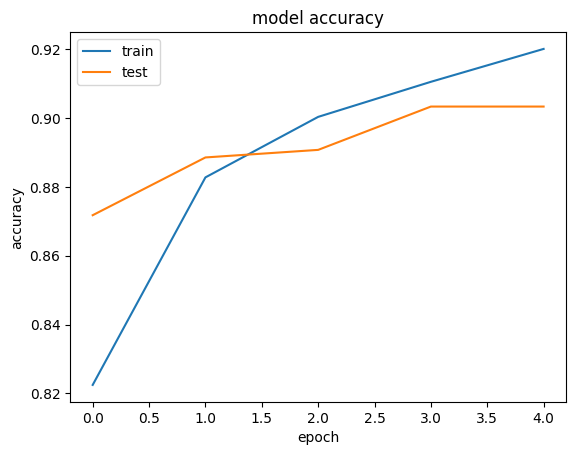

In [ ]:
#ploting the loss and acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

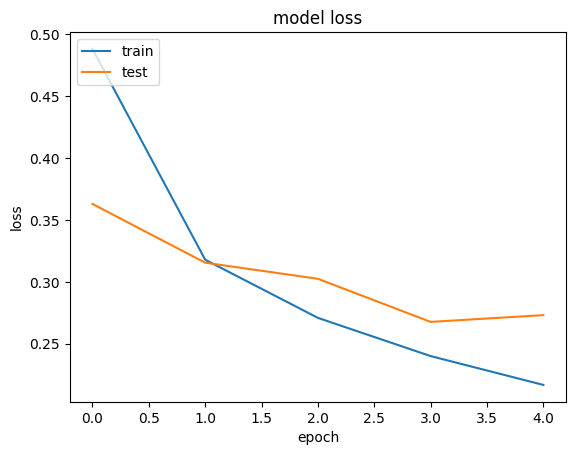

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
model.save('TRAINED_FASHION_MNIST_MODEL.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
